In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [47]:
cvd = pd.read_csv('./data/framingham.csv')

In [48]:
cvd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
cvd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

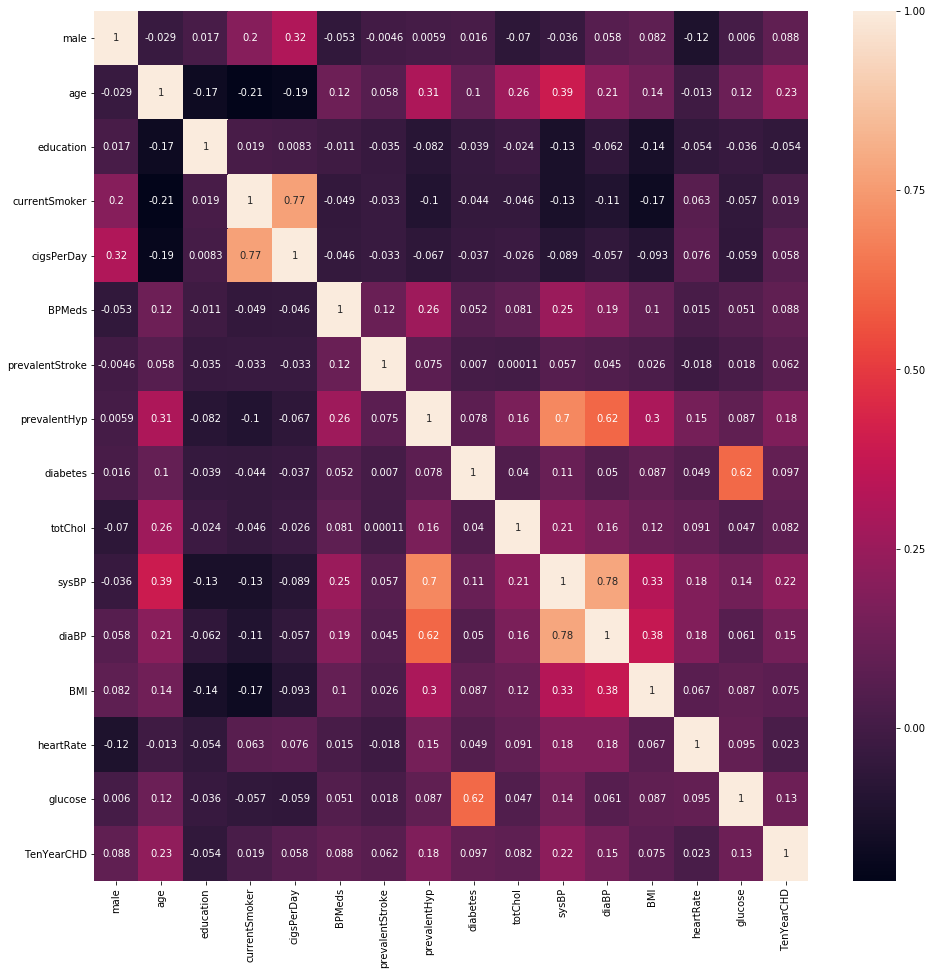

In [50]:
plt.figure(figsize=(16,16))
sns.heatmap(cvd.corr(),annot=True)

In [51]:
cvd.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


# Data Preprocessing

In [52]:
cvd['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [53]:
from sklearn.preprocessing import Imputer

In [54]:
im = Imputer(strategy='most_frequent')
# mean, median, and most_frequent
cvd[['education','BPMeds']]=im.fit_transform(cvd.iloc[:,[2,5]])

In [55]:
im = Imputer(strategy='mean')
# mean, median, and most_frequent
cvd[['cigsPerDay','totChol','BMI','heartRate','glucose']] = im.fit_transform(
    cvd.iloc[:,[4,9,12,13,14]])

In [56]:
edu = pd.get_dummies(cvd['education'],prefix='edu').iloc[:,:-1]
cvd_modi = pd.concat((edu,cvd),axis=1)


In [57]:
cvd_modi.drop(columns='education',inplace=True)

In [58]:
cvd_modi.head()

,edu_1.0,edu_2.0,edu_3.0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,1,0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,0,0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,0,1,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,0,1,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [59]:
cvd.shape

(4240, 16)

In [60]:
# Independent Variale
X = cvd_modi.iloc[:,:-1] # independent variable
y = cvd_modi.iloc[:,-1:] # dependent variables

In [61]:
# split the data into traning and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (2968, 17)
x_test = (1272, 17)
y_train = (2968, 1)
y_test = (1272, 1)


In [62]:
from scipy.stats import chi2

In [63]:
degreeoffreedom = 2968-1-(17-1)

In [64]:
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()
print(model.summary())
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2968
Model:                            GLM   Df Residuals:                     2951
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.9
Date:                Wed, 27 Mar 2019   Deviance:                       2353.8
Time:                        10:58:50   Pearson chi2:                 3.08e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
edu_1.0            -0.1875      0.165     -1.138      0.255      -0.510       0.135
edu_2.0            -0.5696      0.180

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [68]:
vif

,VIF Factor,features
0,5.021099,edu_1.0
1,3.629170,edu_2.0
2,2.451281,edu_3.0
3,2.116067,male
4,42.402129,age
5,4.859853,currentSmoker
6,4.156662,cigsPerDay
7,1.132077,BPMeds
8,1.025186,prevalentStroke
9,2.380557,prevalentHyp


In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
from sklearn.feature_selection import RFE

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
selector = RFE(logmodel)
selector.fit(x_train,y_train)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [25]:
selector.ranking_

array([ 2,  1,  1,  1,  1,  5,  3,  1,  1,  1,  1, 10,  4,  6,  9,  7,  8])

In [26]:
X.columns[selector.support_]

Index(['edu_2.0', 'edu_3.0', 'male', 'age', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

# Build model with selected columns


In [27]:
X_new = X[X.columns[selector.support_]]
X_new.head()

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0,0,1,39,0.0,0,0,0
1,1,0,0,46,0.0,0,0,0
2,0,0,1,48,0.0,0,0,0
3,0,1,0,61,0.0,0,1,0
4,0,1,0,46,0.0,0,0,0


In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (2968, 8)
x_test = (1272, 8)
y_train = (2968, 1)
y_test = (1272, 1)


In [29]:
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()
print(model.summary())
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2968
Model:                            GLM   Df Residuals:                     2960
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.9
Date:                Wed, 27 Mar 2019   Deviance:                       2521.7
Time:                        10:58:04   Pearson chi2:                 3.18e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
edu_2.0            -0.7830      0.123     -6.348      0.000      -1.025      -0.541
edu_3.0            -0.5109      0.148

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
vif[vif['VIF Factor'] < 5]

,VIF Factor,features
0,1.437172,edu_2.0
1,1.274471,edu_3.0
2,1.724329,male
3,3.157350,age
4,1.107136,BPMeds
5,1.025371,prevalentStroke
6,1.633543,prevalentHyp
7,1.035416,diabetes


# Confusion Matrix for traning and testing data

In [31]:
def convertclass(y):
    if y >= 0.5:
        return 1
    else:
        return 0

In [32]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(x_test)
# get class
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

In [33]:
from pandas_ml import ConfusionMatrix
cm_train = ConfusionMatrix(y_train['TenYearCHD'],y_pred_train_class)
cm_test = ConfusionMatrix(y_test['TenYearCHD'],y_pred_test_class)

In [34]:
print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False       2508    12     2520
True         442     6      448
__all__     2950    18     2968 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False       1067     9     1076
True         193     3      196
__all__     1260    12     1272


In [35]:
print('For Traning Data')
cm_train.stats_overall

For Traning Data


C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.8470350404312669),
             ('95% CI', (0.8335755472731855, 0.8598064311353724)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9999999999999999),
             ('Kappa', 0.014256452273658831),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [36]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.8411949685534591),
             ('95% CI', (0.8199319755723578, 0.860867190385392)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9999999999999999),
             ('Kappa', 0.011267085334318153),
             ("Mcnemar's Test P-Value", 'ToDo')])

# Data is *Biased* towards one class

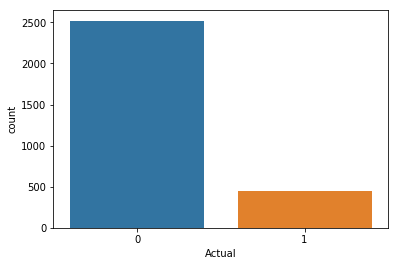

In [37]:
sns.countplot(x='TenYearCHD',data=y_train)

0    2520
1     448
Name: Actual, dtype: int64
0.8490566037735849


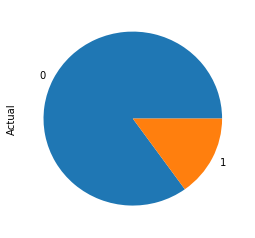

In [38]:
plt.figure(figsize=(4,4))
y_train['TenYearCHD'].value_counts().plot(kind='pie')
print(y_train['TenYearCHD'].value_counts())
print(2520/(2520+448))

# ROC and AUC

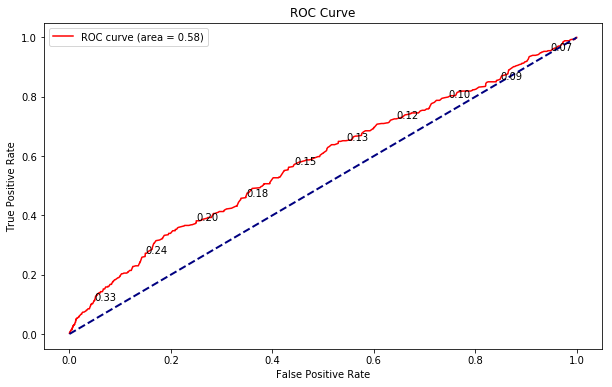

In [39]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_pred_train_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

**From ROC the resonable threshold vale that can be taken into accout is p = 0.15 **

In [40]:
def convertclass(y):
    if y >= 0.15:
        return 1
    else:
        return 0

In [41]:
y_pred_train_prob = model.predict(x_train)
y_pred_test_prob = model.predict(x_test)
# get class
y_pred_train_class = y_pred_train_prob.apply(convertclass)
y_pred_test_class = y_pred_test_prob.apply(convertclass)

from pandas_ml import ConfusionMatrix
cm_train = ConfusionMatrix(y_train['TenYearCHD'],y_pred_train_class)
cm_test = ConfusionMatrix(y_test['TenYearCHD'],y_pred_test_class)

print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False       1361  1159     2520
True         187   261      448
__all__     1548  1420     2968 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False        568   508     1076
True          84   112      196
__all__      652   620     1272


In [42]:
print('For Traning Data')
cm_train.stats_overall

For Traning Data


C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5464959568733153),
             ('95% CI', (0.5283788525941976, 0.5645212964584632)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.0034365787368647992),
             ('Kappa', 0.06483666299617201),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [43]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.5345911949685535),
             ('95% CI', (0.5067334071200293, 0.5622887751355876)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.06140612723126944),
             ('Kappa', 0.052695141097379224),
             ("Mcnemar's Test P-Value", 'ToDo')])